<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Re-inforcement-Learning/blob/main/2348505_Lab2(RL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Implement Tracking Non-Stationary Bandit Problem**

---

### **Importing the Necessary Libraries**

In [7]:
import numpy as np
import matplotlib.pyplot as plt

### **Introduction**

In many real-world applications, such as online advertising or recommender systems, the environment may change over time. This means that the reward distribution of different actions (or arms, in the context of bandits) is not stationary. The **Tracking Nonstationary Bandit Problem** addresses such scenarios by adapting algorithms to account for changing reward distributions.

In this notebook, we will implement and simulate a solution using the **Sliding-Window Upper Confidence Bound (UCB)** algorithm. The Sliding-Window UCB focuses on maintaining a fixed-size window of recent rewards to adapt to changes over time, instead of using all past data.

---

### **Step 1: Define the Nonstationary Bandit Problem**

In this step, we create the environment where the rewards for each arm change over time. We'll simulate this using a simple class, `NonstationaryBandit`, where the reward means of the arms slowly drift over time.

In [8]:
class NonstationaryBandit:
    def __init__(self, n_arms, reward_means, change_rate=0.01):
        self.n_arms = n_arms
        self.reward_means = reward_means
        self.change_rate = change_rate
        self.time = 0

    def pull(self, arm):
        self.reward_means += np.random.normal(0, self.change_rate, size=self.n_arms)
        self.time += 1
        return np.random.normal(self.reward_means[arm], 1)

**Explanation**:
- The bandit has multiple arms (actions), and each arm has a changing reward mean.
- The rewards are drawn from a normal distribution with a mean that changes over time (`change_rate` parameter controls how fast).
- The `pull()` method simulates pulling an arm, giving a reward based on the current state of the arm’s reward distribution.

---

### **Step 2: Implement the Sliding-Window UCB Algorithm**

To adapt to changing rewards, we implement the **Sliding-Window UCB** algorithm. This algorithm only considers a fixed-size window of recent rewards to make decisions, thus allowing it to react to changes in the environment.

---

In [9]:
class SlidingWindowUCB:
    def __init__(self, n_arms, window_size):
        self.n_arms = n_arms
        self.window_size = window_size
        self.counts = np.zeros(n_arms)
        self.rewards = np.zeros(n_arms)
        self.recent_rewards = [[] for _ in range(n_arms)]
    def select_arm(self):
        total_counts = np.sum([len(recent) for recent in self.recent_rewards])
        ucb_values = np.zeros(self.n_arms)

        for arm in range(self.n_arms):
            if len(self.recent_rewards[arm]) == 0:
                return arm
            mean_reward = np.mean(self.recent_rewards[arm])
            confidence_bound = np.sqrt((2 * np.log(total_counts)) / len(self.recent_rewards[arm]))
            ucb_values[arm] = mean_reward + confidence_bound

        return np.argmax(ucb_values)

    def update(self, arm, reward):
        self.counts[arm] += 1
        self.rewards[arm] += reward
        self.recent_rewards[arm].append(reward)
        if len(self.recent_rewards[arm]) > self.window_size:
            self.recent_rewards[arm].pop(0)

**Explanation**:
- `select_arm()`: The UCB formula is applied using only the recent rewards within a sliding window. It balances exploration and exploitation by considering both the average reward and the uncertainty.
- `update()`: After selecting an arm and observing a reward, we update the reward history and ensure that the sliding window does not exceed the specified size.

---

### **Step 3: Simulate the Nonstationary Bandit Problem**

Now that we have both the environment and the algorithm, we can simulate the bandit problem and evaluate the performance of the Sliding-Window UCB.

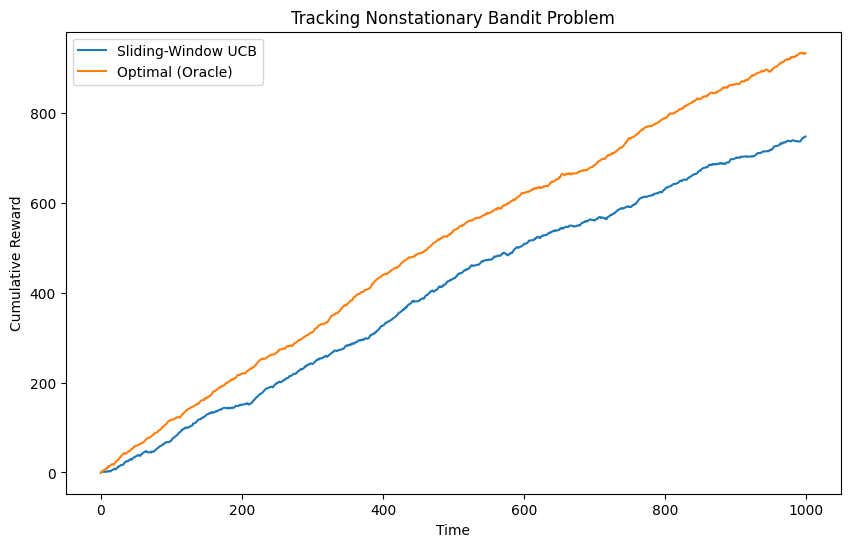

In [10]:
def simulate_bandit(n_arms, horizon, window_size):
    np.random.seed(42)
    reward_means = np.random.uniform(0, 1, size=n_arms)
    bandit = NonstationaryBandit(n_arms, reward_means)
    algorithm = SlidingWindowUCB(n_arms, window_size)
    rewards = np.zeros(horizon)
    optimal_rewards = np.zeros(horizon)
    for t in range(horizon):
        arm = algorithm.select_arm()
        reward = bandit.pull(arm)
        algorithm.update(arm, reward)
        rewards[t] = reward
        optimal_arm = np.argmax(bandit.reward_means)
        optimal_rewards[t] = bandit.pull(optimal_arm)
n_arms = 5
horizon = 1000
window_size = 50

rewards, optimal_rewards = simulate_bandit(n_arms, horizon, window_size)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(rewards), label='Sliding-Window UCB')
plt.plot(np.cumsum(optimal_rewards), label='Optimal (Oracle)')
plt.xlabel('Time')
plt.ylabel('Cumulative Reward')
plt.title('Tracking Nonstationary Bandit Problem')
plt.legend()
plt.show()


**Explanation**:
- We initialize a bandit environment with 5 arms, simulate the reward collection process over 1000 time steps (`horizon`), and track the performance of the Sliding-Window UCB algorithm.
- The `optimal_rewards` track the performance of an ideal oracle that always pulls the best arm at every time step (though this changes over time due to nonstationarity).

### **Results:**
The plot compares the cumulative rewards of the Sliding-Window UCB algorithm with the oracle that knows the best arm at every moment. The closer the algorithm is to the optimal curve, the better it tracks the changing reward distributions.

---

### **Conclusions**

The **Sliding-Window UCB** algorithm is an effective method for adapting to nonstationary environments. By focusing only on recent data, it allows the algorithm to adjust its arm selection strategy as the environment evolves. This is crucial in applications where the reward distributions of actions change over time.
